In [1]:
import pandas as pd
from sklearnex import patch_sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Apply Intel optimizations
patch_sklearn()



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
#Load the datasets
traffic_data = pd.read_csv("Automated_Traffic_Volume_Counts_20241012.csv")
subway_data = pd.read_csv("rows.csv")
ev_data = pd.read_csv("Electric_Vehicle_Charging_Stations_in_New_York_20241012.csv")


In [3]:
# Keep only the necessary columns for Traffic dataset
traffic_cols = ['RequestID', 'Boro', 'Yr', 'M', 'D', 'HH', 'MM', 'Vol', 'SegmentID', 'WktGeom', 'street', 'fromSt', 'toSt']
traffic_data = traffic_data[traffic_cols]

# Keep only the necessary columns for Subway dataset
subway_cols = ['Station Name', 'Station Latitude', 'Station Longitude']
subway_data = subway_data[subway_cols]

# Keep only the necessary columns for EV Charging Stations dataset
ev_cols = ['Station Name', 'Street Address', 'City', 'State', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count', 'Latitude', 'Longitude']
ev_data = ev_data[ev_cols]


In [4]:

# Find the number of unique values in the 'street' column
unique_streets_count = traffic_data['street'].nunique()

# Display the result
print(f'Number of unique streets: {unique_streets_count}')

Number of unique streets: 2328


In [5]:
# Fill missing values in 'toSt' column with 'Dead End'
traffic_data['toSt'].fillna('Dead End', inplace=True)

# Fill missing EV charger counts with 0
ev_data['EV Level1 EVSE Num'].fillna(0, inplace=True)
ev_data['EV Level2 EVSE Num'].fillna(0, inplace=True)
ev_data['EV DC Fast Count'].fillna(0, inplace=True)


/tmp/ipykernel_257941/1954119216.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traffic_data['toSt'].fillna('Dead End', inplace=True)
/tmp/ipykernel_257941/1954119216.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [6]:
#Check for null values in US EV Station dataset
print(ev_data.isnull().sum())

Station Name          0
Street Address        0
City                  1
State                 0
EV Level1 EVSE Num    0
EV Level2 EVSE Num    0
EV DC Fast Count      0
Latitude              0
Longitude             0
dtype: int64


In [7]:
#Check for null values in NYC Traffic dataset
print(traffic_data.isnull().sum())

RequestID    0
Boro         0
Yr           0
M            0
D            0
HH           0
MM           0
Vol          0
SegmentID    0
WktGeom      0
street       0
fromSt       0
toSt         0
dtype: int64


In [8]:
#Check for null values in Subway Station dataset
print(subway_data.isnull().sum())

Station Name         0
Station Latitude     0
Station Longitude    0
dtype: int64


In [9]:
# Filter rows that are not for the year 2024
traffic_non_2024 = traffic_data[traffic_data['Yr'] != 2024]

# Define the percentage increase per year
percentage_increase = 0.046  # 5% yearly increase

# Apply the formula for non-2024 records to estimate the volume for 2024
traffic_non_2024['Vol'] = traffic_non_2024.apply(
    lambda row: row['Vol'] * (1 + percentage_increase * (2024 - row['Yr'])), axis=1
)

# Change the 'Yr' values to 2024 for these rows
traffic_non_2024['Yr'] = 2024

# Concatenate back the 2024 records with the adjusted volume counts
traffic_2024 = traffic_data[traffic_data['Yr'] == 2024]
traffic_data = pd.concat([traffic_2024, traffic_non_2024], ignore_index=True)



/tmp/ipykernel_257941/2274352375.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_non_2024['Vol'] = traffic_non_2024.apply(
/tmp/ipykernel_257941/2274352375.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_non_2024['Yr'] = 2024


In [10]:
# Check if all 'Yr' values have been updated to 2024
updated_years = traffic_data['Yr'].unique()
print("Unique Years in the data after update:", updated_years)

# Check if any 'Vol' values have been updated based on the percentage increase
# Compare a few rows from the original data and the updated data
print("Sample data after volume update:")
print(traffic_data[['Yr', 'Vol', 'street', 'fromSt', 'toSt']].head(10))

# Additional verification for missing 'toSt' column updates
missing_toSt_check = traffic_data[traffic_data['toSt'] == 'Dead End'].shape[0]
print(f"Number of entries with 'toSt' filled as 'Dead End': {missing_toSt_check}")


Unique Years in the data after update: [2024]
Sample data after volume update:
     Yr    Vol           street           fromSt                  toSt
0  2024  154.0  FLATBUSH AVENUE  Atlantic Avenue  Eastern Parkway Line
1  2024  154.0  FLATBUSH AVENUE  Atlantic Avenue  Eastern Parkway Line
2  2024  141.0  FLATBUSH AVENUE  Atlantic Avenue  Eastern Parkway Line
3  2024  154.0  FLATBUSH AVENUE  Atlantic Avenue  Eastern Parkway Line
4  2024  121.0  FLATBUSH AVENUE  Atlantic Avenue  Eastern Parkway Line
5  2024  198.0  FLATBUSH AVENUE  Atlantic Avenue  Eastern Parkway Line
6  2024  160.0  FLATBUSH AVENUE  Atlantic Avenue  Eastern Parkway Line
7  2024  147.0  FLATBUSH AVENUE  Atlantic Avenue  Eastern Parkway Line
8  2024  120.0  FLATBUSH AVENUE  Atlantic Avenue  Eastern Parkway Line
9  2024  103.0  FLATBUSH AVENUE  Atlantic Avenue  Eastern Parkway Line
Number of entries with 'toSt' filled as 'Dead End': 13250


In [11]:
# Assuming you are working with the traffic dataset
# Define the numerical columns you want to scale
numerical_cols = ['Vol', 'HH', 'MM']  # Add other columns you want to scale

# Split into X_train and X_test (for simplicity, using the same dataset for now)
X = traffic_data[numerical_cols]

# Split the data into training and testing sets
# You can use train_test_split or any other method to define X_train and X_test
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Now apply the scaling using Intel oneDAL
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the scaled data for verification
print("X_train_scaled sample:")
print(X_train_scaled[:5])


X_train_scaled sample:
[[-0.19030594 -0.21714289  0.45102991]
 [-0.27365508 -0.07267586 -0.44172584]
 [ 0.10568759  0.79412636  1.34378565]
 [-0.52864417 -0.93947807  1.34378565]
 [-0.41134919 -1.51734621 -0.44172584]]


In [12]:
# Assume X_train and X_test are the datasets containing missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Display the imputed data for verification
print("X_train_imputed sample:")
print(X_train_imputed[:5])

X_train_imputed sample:
[[103.914  10.     30.   ]
 [ 79.66   11.     15.   ]
 [190.046  17.     45.   ]
 [  5.46    5.     45.   ]
 [ 39.592   1.     15.   ]]


In [13]:
# Save cleaned datasets
traffic_data.to_csv("cleaned_datasets_testandtrial/Cleaned_Traffic_Data.csv", index=False)
subway_data.to_csv("cleaned_datasets_testandtrial/Cleaned_Subway_Data.csv", index=False)
ev_data.to_csv("cleaned_datasets_testandtrial/Cleaned_EV_Data.csv", index=False)

In [14]:
# Example DataFrame (assuming traffic_data is already loaded)
# Remove 'POINT(' and ')' using regular expressions
traffic_data['WktGeom'] = traffic_data['WktGeom'].str.replace(r'POINT\s*\(', '', regex=True).str.replace(r'\)', '', regex=True)

# Split the 'WktGeom' column into Easting and Northing
traffic_data[['Easting', 'Northing']] = traffic_data['WktGeom'].str.split(expand=True)

# Convert the columns to float type for proper numerical handling
traffic_data['Easting'] = traffic_data['Easting'].astype(float)
traffic_data['Northing'] = traffic_data['Northing'].astype(float)

# Check if the data was split correctly
print(traffic_data[['Easting', 'Northing']].head())


         Easting       Northing
0  990590.819734  188336.947084
1  990590.819734  188336.947084
2  990590.819734  188336.947084
3  990590.819734  188336.947084
4  990590.819734  188336.947084


In [15]:
from pyproj import Transformer

# Set up the transformer for EPSG:2263 to EPSG:4326 (New York's local coordinate system to latitude/longitude)
transformer = Transformer.from_crs("EPSG:2263", "EPSG:4326", always_xy=True)

# Transform the Easting and Northing columns into Latitude and Longitude
traffic_data['Longitude'], traffic_data['Latitude'] = transformer.transform(traffic_data['Easting'].values, traffic_data['Northing'].values)

# Check the converted Latitude and Longitude values
print(traffic_data[['Latitude', 'Longitude','street']].head())


    Latitude  Longitude           street
0  40.683616 -73.977138  FLATBUSH AVENUE
1  40.683616 -73.977138  FLATBUSH AVENUE
2  40.683616 -73.977138  FLATBUSH AVENUE
3  40.683616 -73.977138  FLATBUSH AVENUE
4  40.683616 -73.977138  FLATBUSH AVENUE


In [16]:
# Group by Month (M), Day (D), Latitude, and Longitude, and aggregate the volume counts (Vol)
grouped_data = traffic_data.groupby(['street','Yr','M', 'D', 'Latitude', 'Longitude'], as_index=False)['Vol'].sum()

# Display the grouped data
print(grouped_data.head())


        street    Yr   M   D   Latitude  Longitude        Vol
0         1 AV  2024   1  21  40.771998 -73.952937  42616.788
1         1 AV  2024  10  11  40.760545 -73.961295    904.816
2         1 AV  2024  10  11  40.768802 -73.955270   3271.616
3         1 AV  2024  10  22  40.760545 -73.961295   1673.056
4  1 AV W RDWY  2024  10  22  40.752181 -73.967314   7612.872


In [17]:
import pandas as pd
import numpy as np

# Round Latitude and Longitude to 3 decimal places in both datasets
traffic_data_rounded = grouped_data.copy()
traffic_data_rounded['Latitude'] = traffic_data_rounded['Latitude'].round(3)
traffic_data_rounded['Longitude'] = traffic_data_rounded['Longitude'].round(3)

ev_data_rounded = ev_data.copy()  # Assuming 'ev_data' is the EV Charging Station dataset
ev_data_rounded['Latitude'] = ev_data_rounded['Latitude'].round(3)
ev_data_rounded['Longitude'] = ev_data_rounded['Longitude'].round(3)

# Merge both datasets based on rounded Latitude and Longitude
merged_data = pd.merge(traffic_data_rounded, ev_data_rounded, on=['Latitude', 'Longitude'], how='inner')

# Drop duplicates based on 'street', 'Latitude', and 'Longitude' columns
merged_data_unique = merged_data.drop_duplicates(subset=['D','Latitude','Longitude'])

# Display the result after removing duplicates
print(merged_data_unique.sort_values(by = 'Vol', ascending = False))






                                 street    Yr   M   D  Latitude  Longitude  \
207                            2 AVENUE  2024   3  12    40.745    -73.976   
205                            2 AVENUE  2024   3  10    40.745    -73.976   
208                            2 AVENUE  2024   3  13    40.745    -73.976   
206                            2 AVENUE  2024   3  11    40.745    -73.976   
6                             12 AVENUE  2024  10  13    40.773    -73.993   
..                                  ...   ...  ..  ..       ...        ...   
463                       RODNEY STREET  2024   6   3    40.714    -73.953   
464                       RODNEY STREET  2024   6   4    40.714    -73.953   
400              N/B YORK AVE @ E 61 ST  2024  10  24    40.760    -73.959   
381  N/B B 102 ST @ ROCKAWAY BEACH BLVD  2024   2  27    40.583    -73.822   
461                       RODNEY STREET  2024   6   1    40.714    -73.953   

           Vol                        Station Name  \
207  6862

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Group traffic volume data by Year, Month, Day for trend analysis
trend_analysis = merged_data_unique.groupby(['Yr', 'M', 'D','street','Latitude','Longitude'])['Vol'].sum().reset_index()
print(trend_analysis.sort_values(by = 'Vol', ascending = False))

       Yr   M   D                  street  Latitude  Longitude        Vol
33   2024   3  12                2 AVENUE    40.745    -73.976  68628.490
25   2024   3  10                2 AVENUE    40.745    -73.976  68315.996
36   2024   3  13                2 AVENUE    40.745    -73.976  67138.134
30   2024   3  11                2 AVENUE    40.745    -73.976  66320.842
228  2024  10  13               12 AVENUE    40.773    -73.993  65234.224
..    ...  ..  ..                     ...       ...        ...        ...
264  2024  10  24  N/B YORK AVE @ E 61 ST    40.760    -73.959      0.000
149  2024   6   4           RODNEY STREET    40.714    -73.953      0.000
148  2024   6   3           RODNEY STREET    40.714    -73.953      0.000
147  2024   6   2           RODNEY STREET    40.714    -73.953      0.000
145  2024   6   1           RODNEY STREET    40.714    -73.953      0.000

[337 rows x 7 columns]


In [20]:
# Remove entries where volume count (Vol) is 0
trend_analysis = trend_analysis[trend_analysis['Vol'] != 0]

# Verify the dataset after removal
print(trend_analysis.sort_values(by = 'Vol'))


       Yr   M   D                                 street  Latitude  Longitude  \
29   2024   3  10       YORK AVE BET E 88TH ST & 89TH ST    40.778    -73.946   
268  2024  10  25                 N/B YORK AVE @ E 61 ST    40.760    -73.959   
321  2024  11  23  N/B 1ST AVE (LEFT TURN BAY) @ E 34 ST    40.743    -73.974   
278  2024  10  29                            KEW GDNS RD    40.714    -73.831   
260  2024  10  23                 N/B YORK AVE @ E 61 ST    40.760    -73.959   
..    ...  ..  ..                                    ...       ...        ...   
228  2024  10  13                              12 AVENUE    40.773    -73.993   
30   2024   3  11                               2 AVENUE    40.745    -73.976   
36   2024   3  13                               2 AVENUE    40.745    -73.976   
25   2024   3  10                               2 AVENUE    40.745    -73.976   
33   2024   3  12                               2 AVENUE    40.745    -73.976   

           Vol  
29       8

In [21]:
# Step 1: Group by street and month, calculate total volume and number of days recorded
monthly_traffic = trend_analysis.groupby(['street', 'M']).agg(
    total_vol=('Vol', 'sum'),
    num_days=('D', 'nunique')  # Count unique days for each street and month
).reset_index()

# Step 2: Calculate average traffic volume per day for each street per month
monthly_traffic['avg_vol_per_day'] = monthly_traffic['total_vol'] / monthly_traffic['num_days']

# Step 3: Extract unique street, latitude, and longitude from trend_analysis
street_coords = trend_analysis[['street', 'Latitude', 'Longitude']].drop_duplicates()

# Step 4: Merge the latitude and longitude with monthly_traffic
monthly_traffic = monthly_traffic.merge(street_coords, on='street', how='left')

# Step 5: Display the updated monthly_traffic with latitude and longitude
print(monthly_traffic[['street', 'M', 'total_vol', 'avg_vol_per_day', 'Latitude', 'Longitude']].sort_values(by='avg_vol_per_day', ascending=False))


                                   street   M   total_vol  avg_vol_per_day  \
2                               12 AVENUE  10  871219.624     62229.973143   
3                               12 AVENUE  11  298563.300     59712.660000   
4                                2 AVENUE   3  346031.252     57671.875333   
0                                    1 AV   1   42616.788     42616.788000   
12                 AVENUE OF THE AMERICAS  11   94168.704     31389.568000   
..                                    ...  ..         ...              ...   
6                               93 AVENUE  11      60.802        60.802000   
33                            KEW GDNS RD  10      43.456        43.456000   
35  N/B 1ST AVE (LEFT TURN BAY) @ E 34 ST  11      34.524        34.524000   
40                 N/B YORK AVE @ E 61 ST  10      64.116        32.058000   
73       YORK AVE BET E 88TH ST & 89TH ST   3       8.220         8.220000   

    Latitude  Longitude  
2     40.773    -73.993  
3     40.77

In [22]:
# Assuming the maximum number of days in a month is 30
monthly_traffic['data_accuracy'] = (monthly_traffic['num_days'] / 30) * 100

# Display data accuracy
print(monthly_traffic[['street', 'M', 'data_accuracy']].head())


      street   M  data_accuracy
0       1 AV   1       3.333333
1   1 AVENUE   1      16.666667
2  12 AVENUE  10      46.666667
3  12 AVENUE  11      16.666667
4   2 AVENUE   3      20.000000


In [23]:
# Step 1: Group by street, sum avg_vol_per_day, and calculate the number of months
yearly_traffic = monthly_traffic.groupby('street').agg(
    total_avg_vol=('avg_vol_per_day', 'sum'),
    num_months=('M', 'nunique')  # Count unique months
).reset_index()

# Step 2: Calculate AADT
yearly_traffic['AADT'] = yearly_traffic['total_avg_vol'] / yearly_traffic['num_months']

# Step 3: Extract latitude and longitude from monthly_traffic (one per street)
street_coords = monthly_traffic[['street', 'Latitude', 'Longitude']].drop_duplicates()

# Step 4: Merge latitude and longitude into yearly_traffic
yearly_traffic = yearly_traffic.merge(street_coords, on='street', how='left')

# Step 5: Display the resulting dataframe with AADT, Latitude, and Longitude
print(yearly_traffic[['street', 'AADT', 'Latitude', 'Longitude']])


                                street          AADT  Latitude  Longitude
0                                 1 AV  42616.788000    40.772    -73.953
1                             1 AVENUE  28917.163600    40.744    -73.974
2                            12 AVENUE  60971.316571    40.773    -73.993
3                             2 AVENUE  57671.875333    40.745    -73.976
4                            93 AVENUE    383.194000    40.705    -73.791
..                                 ...           ...       ...        ...
59  YORK AVE BET E 72ND ST & E 73RD ST   3264.984000    40.767    -73.953
60  YORK AVE BET E 76TH ST & E 77TH ST    609.924000    40.770    -73.952
61    YORK AVE BET E 88TH ST & 89TH ST      8.220000    40.778    -73.946
62  YORK AVE BET E 88TH ST & E 89TH ST  14929.922769    40.778    -73.946
63                         YORK AVENUE  24429.591500    40.760    -73.959

[64 rows x 4 columns]


In [24]:
import folium

# Initialize a map centered on NYC
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Plot each street on the map and color based on traffic volume thresholds
for index, row in yearly_traffic.iterrows():
    # Assuming we have latitude and longitude for each street (you would need to add this if not present)
    lat = row['Latitude']  # Replace with actual latitude column name
    lon = row['Longitude']  # Replace with actual longitude column name
    
    # Set marker color based on volume count
    if row['AADT'] > 10000:
        color = 'green'
    else:
        color = 'red'
    
    # Add marker for the street on the map
    folium.Marker(
        location=[lat, lon],
        popup=f"Street: {row['street']}<br>Volume: {row['AADT']}",
        icon=folium.Icon(color=color)
    ).add_to(nyc_map)

# Save and display the map
nyc_map.save("nyc_traffic_volume_map.html")
nyc_map


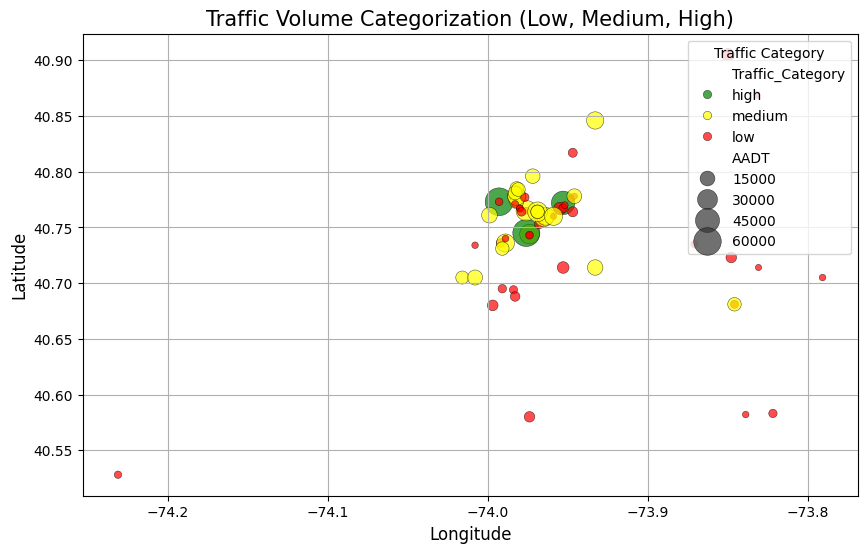

In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming yearly_traffic contains 'AADT', 'Latitude', and 'Longitude'
# Normalize AADT for better clustering performance
aadts = yearly_traffic[['AADT']].values

# Step 1: Intel oneDAL optimized KMeans with 3 clusters
kmeans_algo = KMeans(n_clusters=3, random_state=0, max_iter=300)
yearly_traffic['Cluster'] = kmeans_algo.fit_predict(aadts)

# Step 2: Find the cluster centers and sort them to assign 'low', 'medium', 'high' based on AADT
cluster_centers = kmeans_algo.cluster_centers_.flatten()  # Get cluster centers
sorted_indices = np.argsort(cluster_centers)  # Sort centers by AADT

# Step 3: Map clusters to 'low', 'medium', 'high' based on sorted order
cluster_labels = {sorted_indices[0]: 'low', sorted_indices[1]: 'medium', sorted_indices[2]: 'high'}
yearly_traffic['Traffic_Category'] = yearly_traffic['Cluster'].map(cluster_labels)

# Step 4: Plot the K-means clusters with different colors for each category
plt.figure(figsize=(10, 6))

# Scatter plot by 'Longitude' and 'Latitude', color-coded by 'Traffic_Category' and scaled by 'AADT'
sns.scatterplot(data=yearly_traffic, x='Longitude', y='Latitude', hue='Traffic_Category', 
                palette={'low': 'red', 'medium': 'yellow', 'high': 'green'}, 
                size='AADT', sizes=(20, 400), edgecolor='black', alpha=0.7)

# Adding labels, legend, and title
plt.title('Traffic Volume Categorization (Low, Medium, High)', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Traffic Category', loc='upper right')

# Step 5: Show the plot
plt.grid(True)
plt.show()


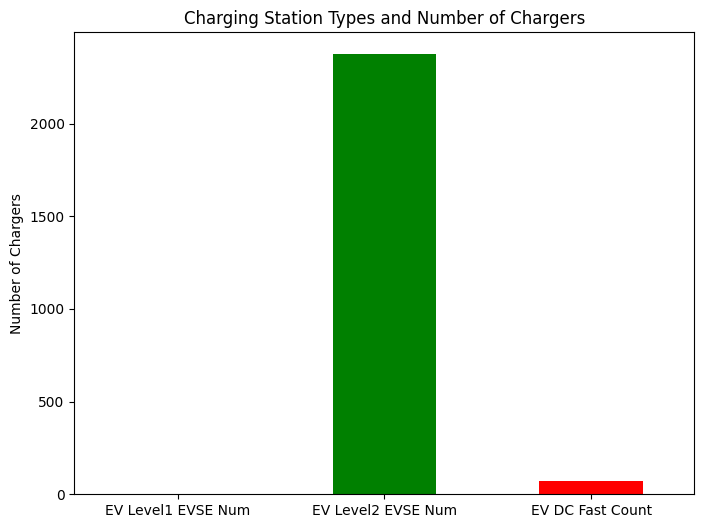

In [27]:
# Analyze the types of charging stations installed at these locations
charging_station_types = merged_data[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']].sum()
charging_station_types.plot(kind='bar', color=['blue', 'green', 'red'], figsize=(8, 6))
plt.title('Charging Station Types and Number of Chargers')
plt.ylabel('Number of Chargers')
plt.xticks(rotation=0)
plt.show()

In [30]:
# Step 1: Filter locations where EV stations are not installed
remaining_locations = traffic_data_rounded[~traffic_data_rounded['street'].isin(trend_analysis['street'])]

# Step 2: Group by street, month, latitude, and longitude, and calculate total volume and number of days recorded
monthly_traffic_remaining = remaining_locations.groupby(['street', 'M', 'Latitude', 'Longitude']).agg(
    total_vol=('Vol', 'sum'),
    num_days=('D', 'nunique')  # Count unique days for each street and month
).reset_index()

# Step 3: Calculate the average traffic volume per day for each street per month
monthly_traffic_remaining['avg_vol_per_day'] = monthly_traffic_remaining['total_vol'] / monthly_traffic_remaining['num_days']

# Step 4: Group by street, latitude, and longitude, and calculate the AADT for each street
yearly_traffic_remaining = monthly_traffic_remaining.groupby(['street', 'Latitude', 'Longitude']).agg(
    total_avg_vol=('avg_vol_per_day', 'sum'),
    num_months=('M', 'nunique')  # Count number of unique months for each street
).reset_index()

# Step 5: Calculate AADT (average annual daily traffic)
yearly_traffic_remaining['AADT'] = yearly_traffic_remaining['total_avg_vol'] / yearly_traffic_remaining['num_months']

# Step 6: Ensure streets are unique by grouping them uniquely with latitude and longitude
unique_yearly_traffic_remaining = yearly_traffic_remaining.groupby(['street']).agg(
    Latitude=('Latitude', 'first'),  # Use the first latitude
    Longitude=('Longitude', 'first'),  # Use the first longitude
    AADT=('AADT', 'mean')  # Average AADT if there are duplicates
).reset_index()

# Display the result with AADT, Latitude, and Longitude
print(unique_yearly_traffic_remaining[['street', 'Latitude', 'Longitude', 'AADT']])


                                  street  Latitude  Longitude          AADT
0                            1 AV W RDWY    40.752    -73.967   6805.882000
1                                  10 AV    40.629    -74.010   1438.186667
2                              10 AVENUE    40.767    -73.990  13817.810824
3                                  10 ST    40.571    -74.115   2720.397333
4                                 101 AV    40.679    -73.863   1103.329000
...                                  ...       ...        ...           ...
2260                   Woodhaven Blvd NB    40.692    -73.851  17312.971700
2261                   Woodhaven Blvd SB    40.692    -73.852  27640.606000
2262                             YORK AV    40.768    -73.953  10160.427158
2263  YORK AVE BET E 82ND ST & E 83RD ST    40.774    -73.949    524.436000
2264  YORK AVE BET E 90TH ST & E 91ST ST    40.779    -73.945  12338.689714

[2265 rows x 4 columns]


In [ ]:
# Check the number of unique street names
unique_streets_count = unique_yearly_traffic_remaining['street'].nunique()
print(f"Unique street count: {unique_streets_count}")

# Display the unique street names
unique_streets = unique_yearly_traffic_remaining['street'].unique()
print("Unique streets:", unique_streets)


                                street          AADT  Latitude  Longitude
135                            3 AV BR  61742.042091    40.808    -73.933
1515            HAMILTON AVENUE BRIDGE  61451.837405    40.672    -73.998
1630           JACKIE ROBINSON PARKWAY  61305.132333    40.683    -73.896
2534  S/B HUTCHINSON RIVER PKWY BRIDGE  60558.624000    40.869    -73.821
626                   BEP EB EXIT 25 A  60557.163600    40.686    -73.726


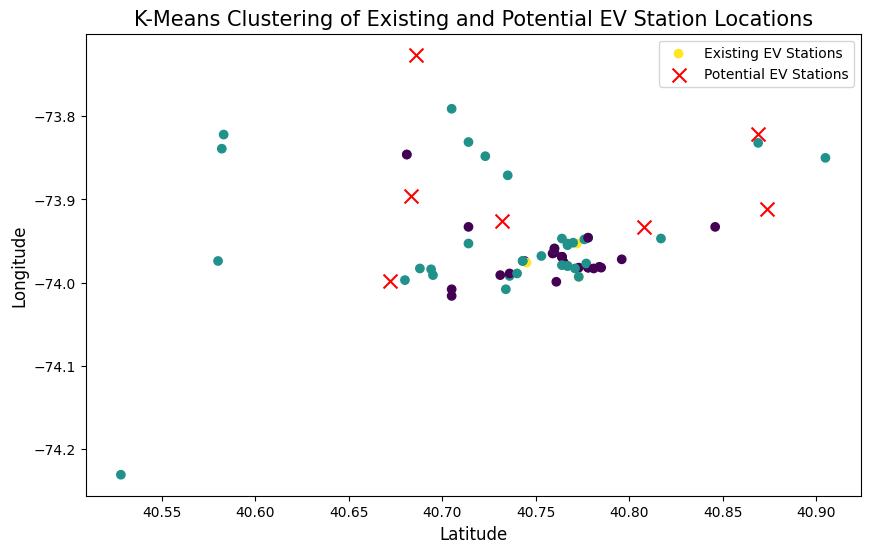

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Assuming yearly_traffic and yearly_traffic_remaining are the datasets
# Select 'AADT' from both datasets
yearly_traffic_AADT = yearly_traffic[['AADT', 'Latitude', 'Longitude']].copy()
yearly_traffic_remaining_AADT = yearly_traffic_remaining[['AADT', 'Latitude', 'Longitude']].copy()

# 2. Perform K-means clustering for yearly_traffic based on AADT
kmeans = KMeans(n_clusters=3, random_state=0)
yearly_traffic['Cluster'] = kmeans.fit_predict(yearly_traffic[['AADT']])

# 3. Select the top 100 locations in remaining dataset based on AADT
top_remaining = yearly_traffic_remaining_AADT.sort_values(by='AADT', ascending=False).head(100)

# 4. Find locations in the remaining dataset that have AADT close (±1000) to the existing clustered points
matching_locations = []
for idx, row in top_remaining.iterrows():
    aadt_value = row['AADT']
    # Get points from yearly_traffic where AADT is within ±1000 range
    close_matches = yearly_traffic_AADT[
        (yearly_traffic_AADT['AADT'] >= (aadt_value - 1000)) & 
        (yearly_traffic_AADT['AADT'] <= (aadt_value + 1000))
    ]
    
    # If matching locations are found, store them
    if not close_matches.empty:
        matching_locations.append(row)

# 5. Convert matching locations to a DataFrame
matching_df = pd.DataFrame(matching_locations)

# 6. Store the dataset with street, AADT, latitude, longitude
final_new_stations = pd.DataFrame({
    'street': yearly_traffic_remaining.loc[matching_df.index, 'street'],
    'AADT': matching_df['AADT'],
    'Latitude': matching_df['Latitude'],
    'Longitude': matching_df['Longitude']
})

# Print the head of the final dataset where new EV stations should be installed
print(final_new_stations.head())

# 7. Plot K-Means clustering diagram

plt.figure(figsize=(10, 6))

# Plot original yearly_traffic clusters
plt.scatter(yearly_traffic['Latitude'], yearly_traffic['Longitude'], c=yearly_traffic['Cluster'], cmap='viridis', label='Existing EV Stations')
plt.scatter(matching_df['Latitude'], matching_df['Longitude'], c='red', marker='x', s=100, label='Potential EV Stations')

# Adding labels and title
plt.title('K-Means Clustering of Existing and Potential EV Station Locations', fontsize=15)
plt.xlabel('Latitude', fontsize=12)
plt.ylabel('Longitude', fontsize=12)

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [34]:
nyc_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)

# Add yearly_traffic locations in blue (existing EV stations)
for index, row in yearly_traffic.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=5, color='blue', fill=True, fill_opacity=0.6, 
                        popup=row['street']).add_to(nyc_map)

# Add final_new_stations locations in red (potential new EV stations)
for index, row in final_new_stations.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],
                        radius=5, color='red', fill=True, fill_opacity=0.6, 
                        popup=row['street']).add_to(nyc_map)
nyc_map


In [38]:
from geopy.distance import geodesic

for index, row in subway_data.iterrows():
    folium.CircleMarker(location=[row['Station Latitude'], row['Station Longitude']],
                        radius=5, color='green', fill=True, fill_opacity=0.6, 
                        popup=row['Station Name']).add_to(nyc_map)

# Display the NYC map with all markers
nyc_map

In [40]:
def is_within_1km(lat1, lon1, lat2, lon2):
    """ Returns True if the distance between two coordinates is within 1 km """
    return geodesic((lat1, lon1), (lat2, lon2)).km <= 1

# Add 'is_near_to_subway' column in final_new_stations
final_new_stations['is_near_to_subway'] = 'no'

# Iterate through final_new_stations and check proximity to subway stations
for index, station in final_new_stations.iterrows():
    for i, subway in subway_data.iterrows():
        if is_within_1km(station['Latitude'], station['Longitude'], subway['Station Latitude'], subway['Station Longitude']):
            final_new_stations.at[index, 'is_near_to_subway'] = 'yes'
            break  # No need to check further if a match is found

# Show the first few rows of the updated final_new_stations with the new column
print(final_new_stations.head())

                                street          AADT  Latitude  Longitude  \
135                            3 AV BR  61742.042091    40.808    -73.933   
1515            HAMILTON AVENUE BRIDGE  61451.837405    40.672    -73.998   
1630           JACKIE ROBINSON PARKWAY  61305.132333    40.683    -73.896   
2534  S/B HUTCHINSON RIVER PKWY BRIDGE  60558.624000    40.869    -73.821   
626                   BEP EB EXIT 25 A  60557.163600    40.686    -73.726   

     is_near_to_subway  
135                yes  
1515               yes  
1630               yes  
2534                no  
626                 no  
